In [1]:
from gdslayout.device import register_device
from gdslayout.device.archimedean import SpiralArchimedean1
import numpy as np

def trigonometric_transition_function(t, y1, y2, N):
        A = (y2 - y1) / 2
        b = (y2 + y1) / 2
        return -A * np.cos(2*np.pi*t*N)+b

@register_device("spiral_archimedean1_varwidth")
class SpiralArchimedean1VarWidth(SpiralArchimedean1):
    def _compute_width_profile(self, base_width):
        N = self.points_orig.shape[0]
        w = np.full(N, float(base_width), dtype=float)
        start_id = len(self.points2)
        end_id = start_id + len(self.point_mid)
        w[start_id:end_id] = trigonometric_transition_function(
            np.linspace(0, 1, end_id - start_id), base_width, 4*base_width, 2
        )
        return w

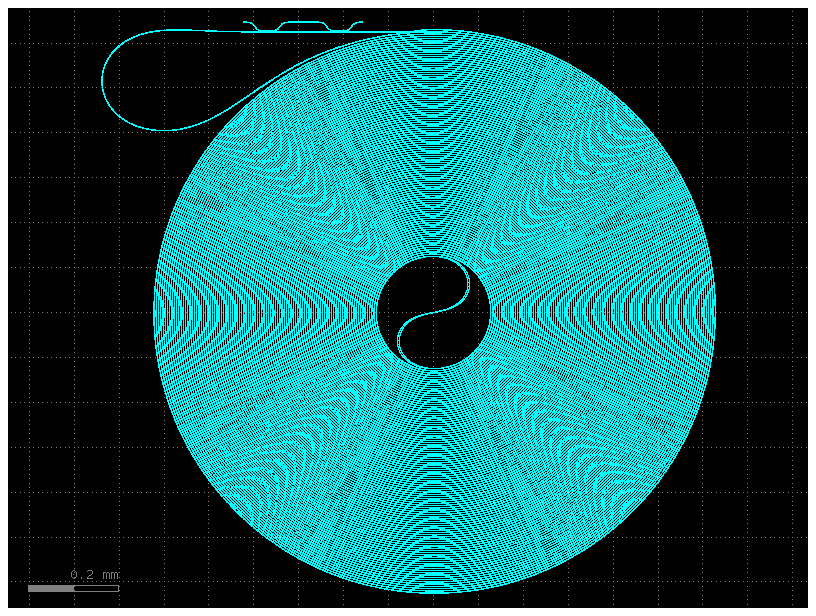

In [2]:
from gdslayout.structure import Structure

structure = Structure(config_path="./config_example/16.yaml")
component = structure.build()
component.plot()

In [3]:
structure.create_gds('./gds/16.gds')

'./gds/16.gds'